In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Đọc dữ liệu từ các file
train = pd.read_excel("/Users/bnabnubne/NLP NMH/Data/train.xlsx")
val = pd.read_excel("/Users/bnabnubne/NLP NMH/Data/val.xlsx")
test = pd.read_excel("/Users/bnabnubne/NLP NMH/Data/test.xlsx")

In [9]:
# 2. Kiểm tra dữ liệu đã đọc
print("\nDữ liệu Train:")
print(train.head())
print("\nDữ liệu Validation:")
print(val.head())
print("\nDữ liệu Test:")
print(test.head())


Dữ liệu Train:
    STT                                           Question   Label
0   955              Chỗ nào tổ chức các lớp học làm bánh?   Where
1   135     Khi nào bạn sẽ tham gia buổi tập huấn kỹ năng?    When
2   521  Bạn nghĩ gì về ý tưởng làm việc từ xa trong tư...    What
3  1087   Có phải bạn đang tìm kiếm cơ hội học bổng không?  Yes/No
4   695  Vì sao chúng ta lại cảm thấy khó khăn khi đưa ...     Why

Dữ liệu Validation:
    STT                                           Question     Label
0   911           Địa chỉ nào cung cấp dịch vụ spa uy tín?     Where
1  1021  Người nào đã giúp bạn hoàn thành luận văn tốt ...       Who
2   264         Điều gì khiến bạn nhớ nhất về thời đi học?      What
3  1129          Trường đại học của bạn có bao nhiêu khoa?  Quantity
4   127          Khi nào bạn dự định học một ngôn ngữ mới?      When

Dữ liệu Test:
    STT                                           Question     Label
0   348                  Giảng viên môn NLP lớp bạn là ai?     

In [10]:
import os

# Đường dẫn tới các tệp
train_path = r"/Users/bnabnubne/NLP NMH/Data/train.xlsx"
val_path = r"/Users/bnabnubne/NLP NMH/Data/val.xlsx"
test_path = r"/Users/bnabnubne/NLP NMH/Data/test.xlsx"

# Kiểm tra kích thước từng tệp
for file_path in [train_path, val_path, test_path]:
    if os.path.exists(file_path):
        size_in_kb = os.path.getsize(file_path) / 1024  # Chuyển đổi sang KB
        print(f"Kích thước của {file_path}: {size_in_kb:.2f} KB")
    else:
        print(f"Tệp {file_path} không tồn tại.")

Kích thước của /Users/bnabnubne/NLP NMH/Data/train.xlsx: 36.04 KB
Kích thước của /Users/bnabnubne/NLP NMH/Data/val.xlsx: 12.37 KB
Kích thước của /Users/bnabnubne/NLP NMH/Data/test.xlsx: 12.28 KB


In [12]:
import re
# Làm sạch văn bản
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Loại bỏ khoảng trắng thừa
    text = text.strip().lower()      # Chuyển về chữ thường
    return text

train['Question'] = train['Question'].apply(clean_text)
val['Question'] = val['Question'].apply(clean_text)
test['Question'] = test['Question'].apply(clean_text)

# Kiểm tra kết quả
print("Dữ liệu sau khi làm sạch (train):")
print(train.head())

Dữ liệu sau khi làm sạch (train):
    STT                                           Question   Label
0   955             chỗ nào tổ chức các lớp học làm bánh ?   Where
1   135    khi nào bạn sẽ tham gia buổi tập huấn kỹ năng ?    When
2   521  bạn nghĩ gì về ý tưởng làm việc từ xa trong tư...    What
3  1087  có phải bạn đang tìm kiếm cơ hội học bổng không ?  Yes/No
4   695  vì sao chúng ta lại cảm thấy khó khăn khi đưa ...     Why


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Tạo đặc trưng TF-IDF
vectorizer = TfidfVectorizer(ngram_range=(1, 2),max_features=5000)
X_train = vectorizer.fit_transform(train['Question'])
X_val = vectorizer.transform(val['Question'])
X_test = vectorizer.transform(test['Question'])

# Lưu TF-IDF vectorizer để tái sử dụng
joblib.dump(vectorizer, "tfidf_vectorizer.joblib")
print("Đã lưu TF-IDF vectorizer vào file tfidf_vectorizer.joblib.")

Đã lưu TF-IDF vectorizer vào file tfidf_vectorizer.joblib.


In [14]:
#Chuẩn bị nhãn
y_train = train['Label']
y_val = val['Label']
y_test = test['Label']

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=42)

In [16]:
# Đánh giá mô hình trên tập validation
y_val_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Đánh giá mô hình trên tập test
y_test_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

         How       0.90      0.78      0.84        23
    Quantity       1.00      1.00      1.00        23
        What       0.85      0.77      0.81        22
        When       0.90      0.86      0.88        22
       Where       0.86      0.86      0.86        22
         Who       1.00      0.96      0.98        23
         Why       0.95      0.86      0.90        22
      Yes/No       0.72      1.00      0.84        23

    accuracy                           0.89       180
   macro avg       0.90      0.89      0.89       180
weighted avg       0.90      0.89      0.89       180

Test Accuracy: 0.9
              precision    recall  f1-score   support

         How       0.83      0.68      0.75        22
    Quantity       1.00      1.00      1.00        22
        What       0.63      0.74      0.68        23
        When       0.95      0.91      0.93        23
       Where       

In [17]:
# Lưu mô hình và vectorizer để sử dụng sau này
joblib.dump(model, "logistic_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
print("Mô hình và vectorizer đã được lưu.")

Mô hình và vectorizer đã được lưu.


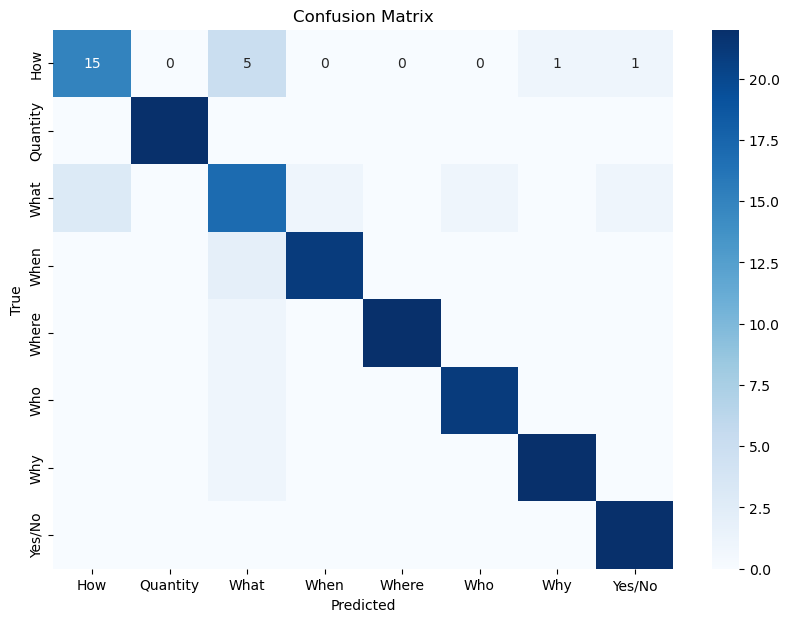

In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [19]:
#Dự đoán nhãn của câu hỏi mới
def predict_question_type(question):
    # Tiền xử lý câu hỏi mới
    question_cleaned = clean_text(question)
    # Chuyển đổi câu hỏi thành đặc trưng TF-IDF
    question_tfidf = vectorizer.transform([question_cleaned])
    # Dự đoán nhãn
    label = model.predict(question_tfidf)
    return label[0]

In [20]:
question = "Nếu được cho 5 điều ước, bạn sẽ ước gì?"
predicted_label = predict_question_type(question)

print(f"Câu hỏi: {question}")
print(f"Dự đoán nhãn: {predicted_label}")

Câu hỏi: Nếu được cho 5 điều ước, bạn sẽ ước gì?
Dự đoán nhãn: What


In [21]:
# Danh sách các câu hỏi
questions = [
    "Nếu được cho 5 điều ước, bạn sẽ ước gì?",
    "Bạn là ai?",
    "Cách để học lập trình hiệu quả là gì?",
    "Làm thế nào để giảm cân an toàn?",
    "Khi nào là thời điểm tốt nhất để đầu tư?"
]

# Dự đoán nhãn cho tất cả câu hỏi
for question in questions:
    predicted_label = predict_question_type(question)
    print(f"Câu hỏi: {question}")
    print(f"Dự đoán nhãn: {predicted_label}")
    print("-" * 50)  # Dòng phân cách giữa các câu hỏi

Câu hỏi: Nếu được cho 5 điều ước, bạn sẽ ước gì?
Dự đoán nhãn: What
--------------------------------------------------
Câu hỏi: Bạn là ai?
Dự đoán nhãn: Who
--------------------------------------------------
Câu hỏi: Cách để học lập trình hiệu quả là gì?
Dự đoán nhãn: How
--------------------------------------------------
Câu hỏi: Làm thế nào để giảm cân an toàn?
Dự đoán nhãn: How
--------------------------------------------------
Câu hỏi: Khi nào là thời điểm tốt nhất để đầu tư?
Dự đoán nhãn: When
--------------------------------------------------


In [22]:
#Test
test_file = "/Users/bnabnubne/NLP NMH/new_data.xlsx"
test_data = pd.read_excel(test_file)

X_test_new = vectorizer.transform(test_data['Question'])
y_pred_new = model.predict(X_test_new)
test_data['predicted_label'] = y_pred_new
test_data.to_excel("predicted_results.xlsx", index=False)

print(test_data[['Question', 'predicted_label']].head())

                           Question predicted_label
0       Khi nào tôi có thể nộp bài?            When
1    Sản phẩm này có giá bao nhiêu?        Quantity
2  Làm thế nào để giải bài tập này?             How
3         Các bước để nấu ăn là gì?            What
4     Cách làm bánh mì như thế nào?             How
